In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
font = {'family' : 'normal',
        'size'   : 22}	
mpl.rc('font', **font)

In [3]:
df = pd.read_csv("./bases/suicide/suicidios.csv") 

In [4]:
df2 = pd.read_csv("./bases/wdi/Country.csv")

In [5]:
df2.replace(["Slovak Republic", "Kyrgyz Republic","St. Lucia","Bahamas, The","Korea, Dem. Rep.","St. Vincent and the Grenadines","Russia"], ['Slovakia', 'Kyrgyzstan', 'Saint Lucia', 'Bahamas', 'Republic of Korea', 'Saint Vincent and Grenadines','Russian Federation'], inplace=True)                                 
filtro2 = df2.TableName.isin(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Mauritius', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Panama', 'Paraguay', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea', 'Romania', 'Russian Federation', 'Saint Lucia', 'Saint Vincent and Grenadines', 'Serbia', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Suriname', 'Sweden', 'Switzerland', 'Thailand', 'Trinidad and Tobago', 'Turkmenistan', 'Ukraine', 'United Kingdom', 'United States', 'Uruguay'])
df2 = df2[filtro2].reset_index(drop=True)
df2.rename(columns={'ShortName':'country','CountryCode':'countrycode'}, inplace=True)

In [10]:
df_inner = pd.merge(df2[['country','countrycode','Region']], df, on='country', how='inner')

,country,countrycode,Region,Unnamed: 0,year,population,suicides,suicides100
0,Albania,ALB,Europe & Central Asia,0,2000,3089027.0,54.0,1.748123
1,Albania,ALB,Europe & Central Asia,1,2001,3060173.0,119.0,3.888669
2,Albania,ALB,Europe & Central Asia,2,2002,3051010.0,133.0,4.359212
3,Albania,ALB,Europe & Central Asia,3,2003,3039616.0,124.0,4.079463
4,Albania,ALB,Europe & Central Asia,4,2004,3026939.0,146.0,4.823355
5,Albania,ALB,Europe & Central Asia,5,2005,3011487.0,0.0,0.000000
6,Albania,ALB,Europe & Central Asia,6,2006,2992547.0,0.0,0.000000
7,Albania,ALB,Europe & Central Asia,7,2007,2970017.0,124.0,4.175060
8,Albania,ALB,Europe & Central Asia,8,2008,2947314.0,160.0,5.428672
9,Albania,ALB,Europe & Central Asia,9,2009,2927519.0,0.0,0.000000


In [6]:
df_inner

NameError: name 'df_inner' is not defined

In [7]:
df3 = df_inner.groupby(['Region','year']).agg(np.sum).reset_index()
df3['suicides100'] = (df3['suicides'] * 100000 ) / df3['population']

NameError: name 'df_inner' is not defined

In [8]:
df3['Region'].unique()
df4 = df3.replace({'East Asia & Pacific':0,'Europe & Central Asia':1,
       'Latin America & Caribbean':2, 'Middle East & North Africa':3,
       'North America':4, 'Sub-Saharan Africa':5})
df4

NameError: name 'df3' is not defined

Text(0, 0.5, 'suicidio por 100.000')

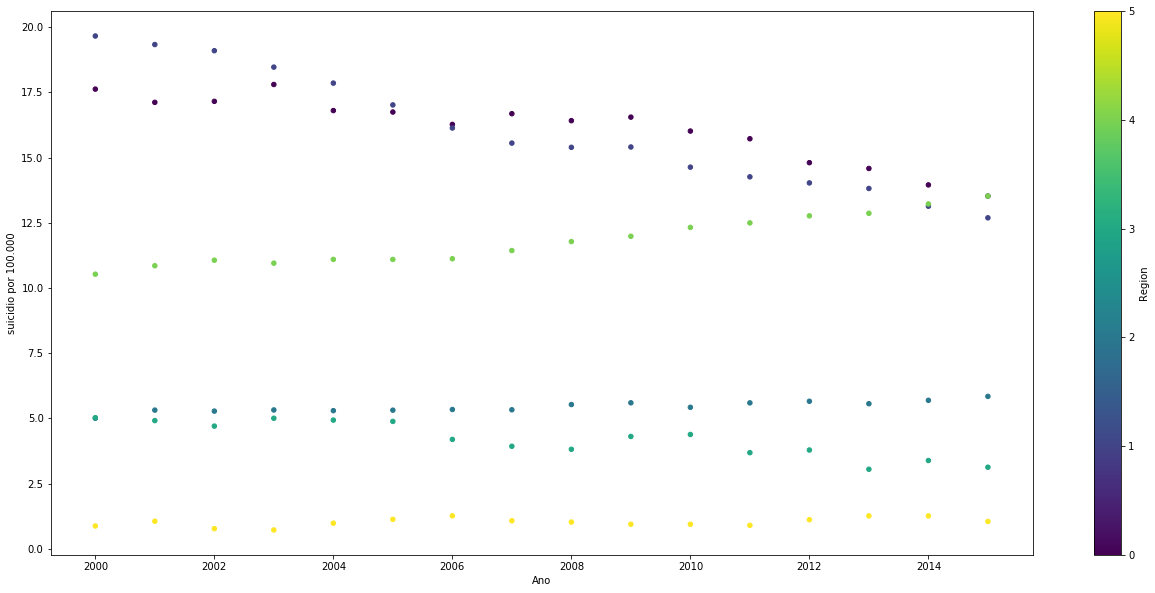

In [36]:
fig, ax = plt.subplots(figsize=(22, 10))
df4.plot.scatter('year','suicides100',c='Region', ax=ax,colormap='viridis')
ax.set_xlabel("Ano")
ax.set_ylabel("suicidio por 100.000")